# Python and Pandas Data Frames


Spring 2018 - Profs. Foster Provost and Josh Attenberg

Teaching Assistant: Apostolos Filippas


***

## Python Packages and Built-in Functions

Python has a ton of packages that make doing complicated stuff very easy. We won't discuss how to install packages, or give a detailed list of what packages exist, but we will give a brief description about how they are used. 

An easy way to think of why package are useful is by thinking: "**Python packages give us access to MANY functions**".

Packages contain pre-defined functions (built-in) that make our life easier!  We've seen pre-defined functions before, for example, the funciton 'str()' that we used to convert numbers into strings in the Python Basics notebook.

In this class we will use four packages very frequently: `pandas`, `sklearn`, `matplotlib`, and `numpy`:

- **`pandas`** is a data manipulation package. It lets us store data in data frames. More on this soon.
- **`sklearn`** is a machine learning and data science package. It lets us do fairly complicated machine learning tasks, such as running regressions and building classification models with only a few lines of code. (Nice!)
- **`matplotlib`** lets you make plots and graphs directly from your code.  This can be a secret weapon when combined with notebooks, as you can very easily rerun analyses on different data or with slightly different code, and the graphs can just appear magically.  (Ok, always easier said than done, but you get the idea.)
- **`seaborn`** an extension to matplotlib that really helps make your plots look more appealing
- **`numpy`** (pronounced num-pie) is used for doing "math stuff", such as complex mathematical operations (e.g., square roots, exponents, logs), operations on matrices, and more. 

As we use these through the semester, their usefulness will become increasingly apparent.

To make the contents of a package available, you need to import it:

In [1]:
import pandas
import sklearn
import matplotlib
import numpy
import seaborn

Sometimes it is easier to use short names for packages. This has become the norm now, so let's do it sometimes so that you recognize it if you encounter it in your work.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# this trick is required to get plots to display inline with the rest of your notebook,
# not in a separate window
%matplotlib inline

# just some stylistic tweaks in seaborn
sns.set(style='ticks', palette='Set2')

We can now use package-specific things. For example, numpy has a function called `sqrt()` which will give us the square root of a numpy number. Since it is part of numpy, we need to tell Python that that's where it is by using a dot (e.g., `np.sqrt()`).

In the following cell you can also see how to write **comments** in your code. Take my advice: write comments as you go.  It's helpful when you want to collaborate, then you don't have to figure out what you did to explain it to your collaborator.  But even more: often you need to come back to an analysis weeks, months, or even years later, and you will thank yourself for explaining what you did!

In [3]:

some_list = [0,0,1,2,3,3,4.5,7.6]
some_dictionary = {'student1': '(929)-000-0000', 'student2': '(917)-000-0000', 'student3': '(470)-000-0000'}
some_set = set( [1,2,4,4,5,5] )


# In this part of the code I am using numpy (np) functions

print ("Square root: " + str ( np.sqrt(25) ))
print ("Maximum element of our previous list: " + str( np.max(some_list) ))

# In this part of the code I am using python functions

print ("Number of elements in our previous list: " + str( len(some_list) ))
print ("Sum of elements in our previous list: " + str( sum(some_list) ))
print ("Range of 5 numbers (remember we start with 0): " + str( range(5) ))



Square root: 5.0
Maximum element of our previous list: 7.6
Number of elements in our previous list: 8
Sum of elements in our previous list: 21.1
Range of 5 numbers (remember we start with 0): [0, 1, 2, 3, 4]


What about the package **Pandas**? 

Pandas gives us the **DATAFRAME** -- one of the main data structures used in data analytics.

A Dataframe is 2-dimensional "labeled" data structure with columns of potentially different types. It is generally the most commonly used pandas object. Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. It's often convenient to think of it as a spreadsheet with super powers! [More details here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

Pandas data frames can be constructed from most common data sources a data scientist will encounter: csv files, excel spreadsheets, sql databases, json, url pointers to other data sources, and even from other data already stored in one's python code. 

Let's take a look at creating a data frame from a common "toy" dataset presenting automobile mpg information.


In [4]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                'model', 'origin', 'car_name']

mpg_df = pd.read_csv(url,
                     delim_whitespace=True,
                     header=None,
                     names=column_names)

We now have the data loaded in a pandas data frame, as a starter, let's see some of the (MANY!) ways pandas makes it convenient to explore a dataset

In [5]:
# first, just get a peek at the data:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [6]:
# some general stats about the data
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
# info about the rows columns themselves
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model           406 non-null float64
origin          406 non-null float64
car_name        406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


In [8]:
# how many of each type of engine? 
mpg_df["cylinders"].value_counts()

4.0    207
8.0    108
6.0     84
3.0      4
5.0      3
Name: cylinders, dtype: int64

In [9]:
# total horsepower
mpg_df["horsepower"].sum()

42033.0

In [10]:
# average horsepower per engine type
mpg_df.groupby("cylinders").horsepower.mean()

cylinders
3.0     99.250000
4.0     78.470297
5.0     82.333333
6.0    101.506024
8.0    158.453704
Name: horsepower, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11965dd10>]],
      dtype=object)

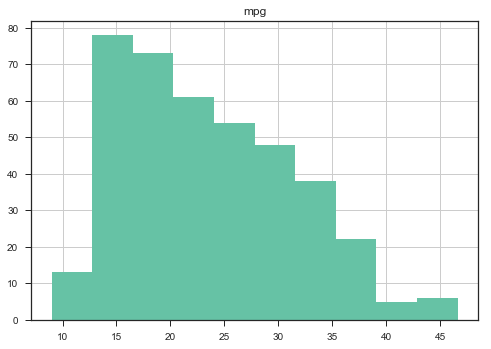

In [11]:
# plotting a histogram of mpg
mpg_df.hist("mpg")

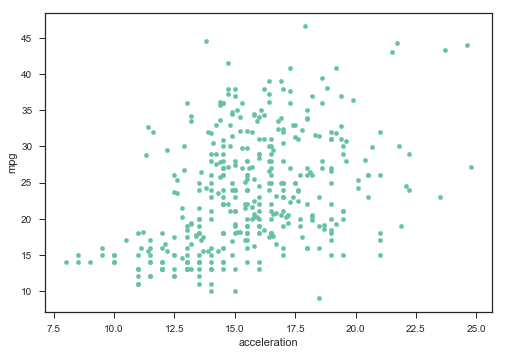

In [12]:
# or a scatter plot of acceleration vs mpg
mpg_df.plot(kind="scatter", x="acceleration", y="mpg")

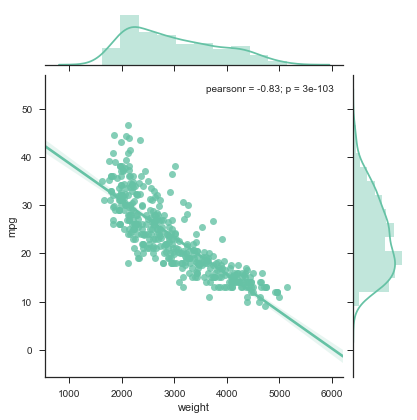

In [13]:
# some pretty plotting comparing weight to mpg using regression in seaborn
sns.jointplot("weight", "mpg", mpg_df, kind="reg")

Pandas is widely used and has a very active development community contributing new features. If there is some kind of analysis you want to do on your data, chances are, it already exists. The [documentation for the pandas library](https://pandas.pydata.org/pandas-docs/stable/) is very good, but the site's search functionality is, unfortunately poor. I usually use google to find the information I need.

One important component of pandas is indexing and selecting components of the data. This is a extremely rich topic, so i'll only touch on it here. Please [consult the documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more info. 

In [14]:
# selecting columns is done using the `[]` operator,
# which accepts one column name or a list of several
mpg_df[["cylinders", "car_name"]].head(5)

,cylinders,car_name
0,8.0,chevrolet chevelle malibu
1,8.0,buick skylark 320
2,8.0,plymouth satellite
3,8.0,amc rebel sst
4,8.0,ford torino


In [15]:
# as some "syntactic sugar", pandas also allows selection using the `.column_name` notation
# note that both cases can be used for assignment!
mpg_df.car_name.head(5)

0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
Name: car_name, dtype: object

For selecting rows from the data there are two options:
- `.loc`: for selecting rows based on the _row label_
- `.iloc`: for selecting rows based on the _row number_

In the prior example, the row label and the row number are the same; often one wants to assign labels to rows, a unique id. In many cases, this would be something like a date or a user id. Note: these two selectors can also be used to pick columns, but I think that's a bit less common. 

In [16]:
# a single row
mpg_df.iloc[5]

mpg                           15
cylinders                      8
displacement                 429
horsepower                   198
weight                      4341
acceleration                  10
model                         70
origin                         1
car_name        ford galaxie 500
Name: 5, dtype: object

In [17]:
# selecting the first 5 rows
mpg_df.iloc[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [18]:
# here we see the difference between label & index selecting
mpg_df.loc[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500


One can also select those rows that match a particular condition. Say I want to only see those rows that have an acceleration less that 10 seconds

In [19]:
mpg_df[mpg_df["acceleration"] < 10].head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl
16,14.0,8.0,340.0,160.0,3609.0,8.0,70.0,1.0,plymouth 'cuda 340
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302


If we have _actual labels_ as an index for a dataframe, we can use `.loc` to select using values from that index

In [33]:
car_index_df = mpg_df.set_index("car_name", inplace=False)
car_index_df.loc[["amc rebel sst", "plymouth fury iii"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
car_name,,,,,,,,
amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
plymouth fury iii,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0
plymouth fury iii,14.0,8.0,318.0,150.0,4096.0,13.0,71.0,1.0
plymouth fury iii,15.0,8.0,318.0,150.0,4135.0,13.5,72.0,1.0


Often, one wants to create a data frame from information that is available "in code"- these might be results of prior computations that aren't already in pandas or maybe just some small static dataframe that stores some info. There are two common ways to do this: lists-of-lists with an additional list of column names and lists of dictionaries. I prefer the latter since the data in this case is self-descriptive, order isn't important, and missing data is handled more smoothly, but I'll give examples below for both. 

In [20]:
# list-of-lists approach

list1 = ['studentA',22,'(929)-000-000']
list2 = ['studentB',np.nan,'(646)-000-000']
list3 = ['studentC',30,'(917)-000-000']
list4 = ['studentD',31,'(646)-001-001']
list5 = ['studentE',np.nan,'(929)-001-001']
list6 = ['studentF',30,'(917)-001-001']
list7 = ['studentG',30,'(470)-001-001']

list_of_lists = [list1, list2, list3, list4, list5, list6, list7]
column_names = ['Name','Age','Mobile']

lol_df = pd.DataFrame(list_of_lists,columns=column_names)
lol_df.head(5)



,Name,Age,Mobile
0,studentA,22.0,(929)-000-000
1,studentB,NaN,(646)-000-000
2,studentC,30.0,(917)-000-000
3,studentD,31.0,(646)-001-001
4,studentE,NaN,(929)-001-001


In [21]:
# this is the list of dicts approach
alice = {"name": "alice", "age": 5, "mobile":"555-222-9000"}
bob = {"name": "bob", "age": 100}
casey = {"age":35, "name": "casey", "mobile":"1-877-kars-4kids"}

list_of_dicts = [alice, bob, casey]
lod_df = pd.DataFrame(list_of_dicts)
lod_df.head(5)

,age,mobile,name
0,5,555-222-9000,alice
1,100,NaN,bob
2,35,1-877-kars-4kids,casey


We can also add columns ( they should have the same number of rows as the dataframe they are being added to )

In [22]:

lol_df['Business Major'] = ['yes','no','yes','yes','yes','no','yes']
lol_df['Years Experience'] = [1,4,2,6,0,3,0]

lol_df.head(5)


,Name,Age,Mobile,Business Major,Years Experience
0,studentA,22.0,(929)-000-000,yes,1
1,studentB,NaN,(646)-000-000,no,4
2,studentC,30.0,(917)-000-000,yes,2
3,studentD,31.0,(646)-001-001,yes,6
4,studentE,NaN,(929)-001-001,yes,0



What about operations on entire columns? This can make data munging much easier!

Let's take the difference between age and years of experience:


In [23]:

lol_df["Age"] - lol_df["Years Experience"]


0    21.0
1     NaN
2    28.0
3    25.0
4     NaN
5    27.0
6    30.0
dtype: float64

All of the data frames used thus far have had missing values. We see that by default, pandas just displays `NaN`, when the value of a cell is unknown. Sometimes this interferes with the computation we're trying to accomplish. Fortunately, there is a [suite of functionality](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) for dealing with missing data built in.

Let's (for some reason) fill missing age info with the average age!

In [24]:
lol_df["Age"].fillna(lol_df["Age"].mean()) - lol_df["Years Experience"]

0    21.0
1    24.6
2    28.0
3    25.0
4    28.6
5    27.0
6    30.0
dtype: float64

#### Extra added bonus!!   ---  Auto-complete

One of the most useful things about IPython notebook is its tab completion. 

Try this: type `np.sqrt(` in the cell below and press `Shift + Tab` 4 times, slowly

I find this amazingly useful. I think of this as "the more confused I am, the more times I should press Shift+Tab". Nothing bad will happen if you tab complete 12 times.

Okay, let's try tab completion for function names! Type `np.sq` then hit `Tab` when typing below to get suggestions.

This is super useful when (like me) you forget the names of everything!

#### Special Bonus 2! -- inline pyton help
One of the coolest things about jupyter notebooks is that they give you access to the documentation of the objects and functions you're interacting with inside the notebook! just put a `?` at the beginning of the line, followed immediately by the thing you'd like help on:


In [25]:
?np.sqrt

In [26]:
?float

# A Taste of Whats to Come: Predictive Modeling
We've seen thus far some examples of how jupyter, pandas and some other tools are great for manipulating and exploring data. This is great, but much of the power of data comes from it's ability to help us predict future or unknown quantities. While this topic will be explored in much greater depth throughout the remainder of this class, I'd like to give a sneak peek of some of what we'll be doing in the future. 

For this, let's build a simple model to predict the mpg of cars from the other information we have available on those cars.

In [27]:
# first we'll need to import the predictive model we'll use
from sklearn import linear_model 

In [28]:
# build a model
linear = linear_model.Lasso(alpha=0.01)

# we'll use these columns as predictors
predictors = ["weight", "acceleration", "weight", "cylinders", "displacement"]
target = "mpg"

# drop any NaNs for now
cleaned_df = mpg_df.dropna()

# fit the model to the data!
linear.fit(cleaned_df[predictors], cleaned_df[target])

# inspect the coefficients:

pd.DataFrame([dict(zip(predictors, linear.coef_))])

,acceleration,cylinders,displacement,weight
0,0.185294,-0.248318,-0.007103,0.000248


In [29]:
# let's get some predictions from the model
preds = linear.predict(cleaned_df[predictors])

predictions_df = cleaned_df.assign(predictions=preds)

predictions_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,predictions
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,18.134047
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,16.576941
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,18.287634
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,18.590763
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,18.228907


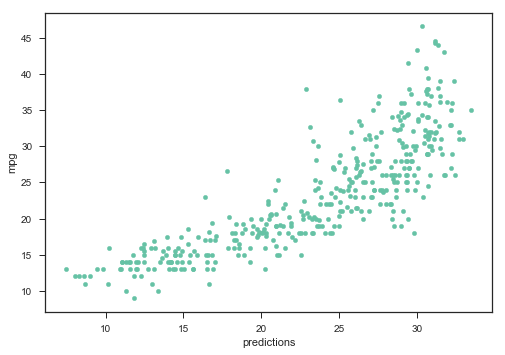

In [30]:
# and lets try a scatter plot of our predicted mpg and the true value
predictions_df.plot(kind="scatter", x="predictions", y="mpg")

## Hands-on

To master your new-found knowledge of Python, try these hands-on examples. 

Your homeworks will be in a similar format to this section.

Consider the following excel spreadsheet containing the results of compressive tests for various types of concrete

In [31]:
concrete_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"

**1. Poad this data into a pandas data frame. Print some high-level statistical info about the data frame's columns.**

**2. How many rows have a compressive strength > 40 MPa?**

**3. Plot the histogram of Course Aggregate and Fine Aggregate values **

**4. Make a plot comparing compressive strength to age **

**5. Make a plot comparing compressive strength to age for only those rows with < 750 fine aggregate **

**6. Try to build a linear model that predicts compressive strength given the other available fields**


**7. Generate predictions for the different types of concrete. Generate a scatterplot comparing the predicted compressive strengths to the actual values. **